# Extract Intrinsic Currents from Raw ABF files of Voltage Steps

In [5]:
import pyabf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.metrics import auc
from mpl_toolkits.mplot3d import Axes3D


## Read in the data

In [11]:
dir = ''
#dir_in = r'D:\Dropbox\Projects\All Olive\Intrinsic\ABF\CaMK Cre\-55 mV'
#dir_in = dir_in.replace (r'\', r'\\\')
file_in = '2019_08_08_0008.abf'
#dir_out = dir_in + '\\Analyzed'

#os.chdir (dir_in)
abf = pyabf.ABF(file_in)

## Function Definitions

## Set up the data frame

In [12]:
columns = {'filename':[], 'vstep':[], 'baseline':[],'h_peak':[],'ss_peak':[],'ahp_peak':[],'ca_peak':[],'i_h':[],'i_ahp':[],'i_ca':[],'i_input':[],'r_input':[]}

channels = [0,2]
sweep_list = abf.sweepList # Get all sweeps in the file
step_list = list([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55])



## Analyze the raw traces for relevant peaks for Ch1

,filename,vstep,baseline,i_ss,i_h,i_ahp,i_ca,r_input,h_peak,ss_peak,ahp_peak,ca_peak,i_input
0,2019_08_08_0008.abf,-55.0,-96.972656,-347.399902,14.685059,92.089844,-1622.387695,158.318985,-429.687500,-444.372559,-4.882812,-1719.360352,-347.399902
0,2019_08_08_0008.abf,-45.0,-89.157722,-270.515717,11.162689,75.119637,-1674.758301,166.348930,-348.510742,-359.673431,-14.038086,-1763.916016,-270.515717
0,2019_08_08_0008.abf,-35.0,-86.156006,-192.811859,13.464935,70.897217,-193.995361,181.524104,-265.502930,-278.967865,-15.258789,-280.151367,-192.811859
0,2019_08_08_0008.abf,-25.0,-92.430420,-127.144760,3.510727,39.940186,-130.958252,196.626271,-216.064453,-219.575180,-52.490234,-223.388672,-127.144760
0,2019_08_08_0008.abf,-15.0,-94.719231,-50.446785,11.499023,13.542473,-53.596199,297.343032,-133.666992,-145.166016,-81.176758,-148.315430,-50.446785
0,2019_08_08_0008.abf,-5.0,-82.631836,-2.584229,4.039307,2.675781,-11.972656,1934.813415,-81.176758,-85.216064,-79.956055,-94.604492,-2.584229
0,2019_08_08_0008.abf,5.0,-104.974358,56.043694,101.420898,31.121819,-94.000252,89.216104,52.490234,-48.930664,-73.852539,-198.974609,56.043694
0,2019_08_08_0008.abf,15.0,-92.384033,115.742798,180.498657,19.752197,-221.947021,129.597697,203.857422,23.358767,-72.631836,-314.331055,115.742798
0,2019_08_08_0008.abf,25.0,-99.216316,277.536011,197.656860,69.919441,-147.365723,90.078401,375.976562,178.319702,-29.296875,-246.582031,277.536011
0,2019_08_08_0008.abf,35.0,-97.590324,423.479034,227.089813,92.707512,-148.991699,82.648720,552.978516,325.888702,-4.882812,-246.582031,423.479034


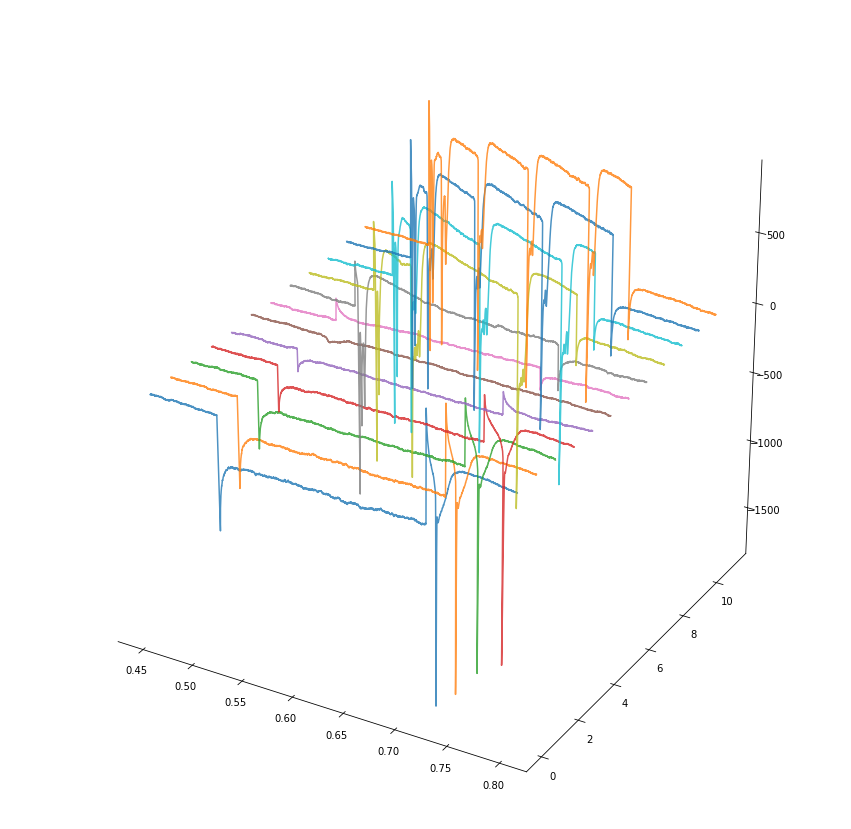

In [17]:
channel = 2
x1 = np.nan
x2 = np.nan
y1 = np.nan
y2 = np.nan

baseline_start = 450  * abf.dataPointsPerMs
baseline_end = 500  * abf.dataPointsPerMs 
h_start = 516 * abf.dataPointsPerMs 
h_end =  546 * abf.dataPointsPerMs
ss_start =  610 * abf.dataPointsPerMs
ss_end = 710  * abf.dataPointsPerMs
ahp_start =  725 * abf.dataPointsPerMs
ahp_end = 800  * abf.dataPointsPerMs
ca_start = 715 * abf.dataPointsPerMs
ca_end = 726* abf.dataPointsPerMs
        
df = pd.DataFrame.from_dict (columns)   
file_out = file_in.replace('.abf','') + '_Ch_' + str(channel) + '.csv' 
i = 0
fig = plt.figure(figsize =(15,15))
ax = fig.add_subplot(111, projection='3d')
for sweep in sweep_list:
    filename = file_in
    vstep = step_list[i]
    abf.setSweep (sweepNumber = sweep, channel = channel)    
    x = abf.sweepX[baseline_start:ahp_end]
    y = abf.sweepY[baseline_start:ahp_end]
    x_min = min(x)
    x_max = max(x)
    y_min = min (y)
    y_max = max(y)
    sf = abf.dataPointsPerMs  *1000 # scale factor for referencing time on the plotted data (points/sec)
    baseline = np.average (abf.sweepY [baseline_start: baseline_end])
    h_peak = np.max (abf.sweepY [h_start: h_end])
    ss_peak = np.average (abf.sweepY [ss_start: ss_end])
    ahp_peak = np.max (abf.sweepY [ahp_start: ahp_end])
    ca_peak = np.min (abf.sweepY [ca_start: ca_end])
    
    i_ss = ss_peak - baseline
    i_h = h_peak - ss_peak
    i_ahp = ahp_peak - baseline
    i_ca = ca_peak - baseline
    i_input = ss_peak - baseline
    r_input = vstep/i_input * 1000
    df = df.append ([{'filename':filename, 'vstep':vstep, 'baseline':baseline, 'h_peak':h_peak, 
                          'ss_peak':ss_peak, 'ahp_peak':ahp_peak, 'ca_peak':ca_peak, 'i_ss':i_ss,'i_h':i_h,'i_ahp':i_ahp, 
                          'i_ca':i_ca, 'i_input':i_input, 'r_input': r_input}], sort = False)
    df = df[['filename', 'vstep', 'baseline', 'i_ss','i_h','i_ahp','i_ca', 'r_input', 'h_peak', 'ss_peak', 'ahp_peak',
        'ca_peak', 'i_input']]
    ax.plot (x, y, i, zdir = 'y', alpha = 0.8)  
    # make the panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    i = i + 1
    
display(HTML(df.to_html()))
   
try:
    os.stat(dir_out)
except:
    os.makedirs(dir_out)
    
# Write data to file
os.chdir(dir_out)
df.to_csv(file_out, index = False)
       

